In [2]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

In [17]:
df = pd.DataFrame()

In [18]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [19]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

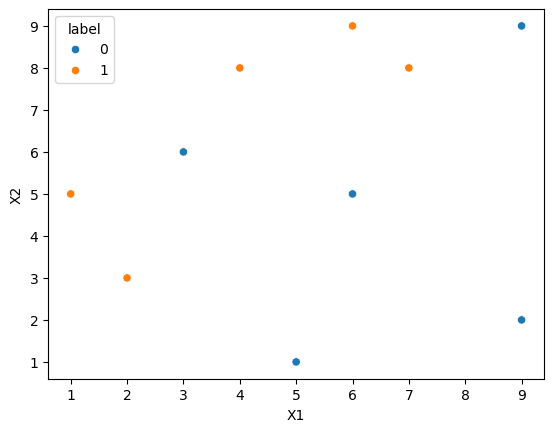

In [20]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [21]:
df['weights'] = 1/df.shape[0]

In [22]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [23]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt1 = DecisionTreeClassifier(max_depth = 1)

In [26]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [27]:
# step 2 - train the first model

dt1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

In [34]:
DecisionTreeClassifier(ccp_alpha = 0.0, class_weight = None, criterion = 'gini',
                      max_depth = 1, max_features = None, max_leaf_nodes = None,
                      min_impurity_decrease = 0.0,
                      min_samples_leaf = 1, min_samples_split = 2,
                      min_weight_fraction_leaf = 0.0,
                      random_state = None, splitter = 'best')

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

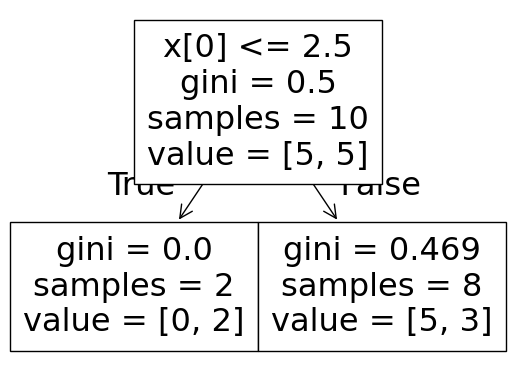

In [36]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

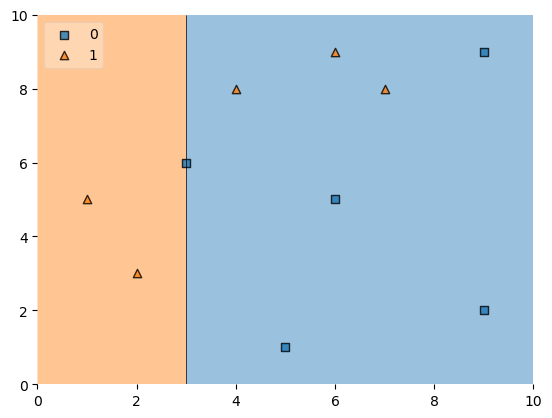

In [39]:
plot_decision_regions(X, y, clf = dt1, legend = 2)

In [42]:
df['y_pred'] = dt1.predict(X)

In [43]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [120]:
def calculate_error(df):
    error = 0
    for i in range(df.shape[0]):
        if df.loc[i, 'label'] != df.loc[i, 'y_pred']:
            error += df.loc[i, 'weights']

    return error

In [127]:
def calculate_model_weight(error):

    return 0.5 * np.log((1 - error) / (error + 0.0000001))

In [69]:
# step 3- calculate model weight
alpha1 = calculate_model_weight(calculate_error(df))
alpha1

np.float64(0.4236489301936017)

In [79]:
#step4 - update weights


# this is not working bcz we're applying df['updated_weights'] = df.apply(update_row_weights,axis=1)

#def update_row_weights(df, alpha = 0.423):
#   for i in range(df.shape[0]):
##         df.loc[i, 'weights'] = df.loc[i, 'weights'] * np.exp(-1 * alpha)
#   else:
#       df.loc[i, 'weights'] = df.loc[i, 'weights'] * np.exp(alpha)

def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [81]:
df['updated_weights'] = df.apply(update_row_weights, axis = 1)

In [82]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [84]:
df['updated_weights'].sum()

np.float64(0.9165153319682015)

In [85]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [86]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [91]:
df['normalized_weights'].sum()

np.float64(1.0)

In [92]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [93]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [95]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [98]:
def create_new_dataset(df):
    indices = []

    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [101]:
index_values = create_new_dataset(df)
index_values

[7, 5, 4, 2, 7, 7, 1, 9, 2, 0]

In [104]:
second_df = df.iloc[index_values, [0, 1, 2, 3]]

In [105]:
second_df

,X1,X2,label,weights
7,7,8,1,0.1
5,6,9,1,0.1
4,5,1,0,0.1
2,3,6,0,0.1
7,7,8,1,0.1
7,7,8,1,0.1
1,2,3,1,0.1
9,9,2,0,0.1
2,3,6,0,0.1
0,1,5,1,0.1


In [110]:
dt2 = DecisionTreeClassifier(max_depth = 1)

In [111]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [112]:

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

DecisionTreeClassifier(max_depth=1)

In [114]:
dt2.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.625, 0.5, '  False')]

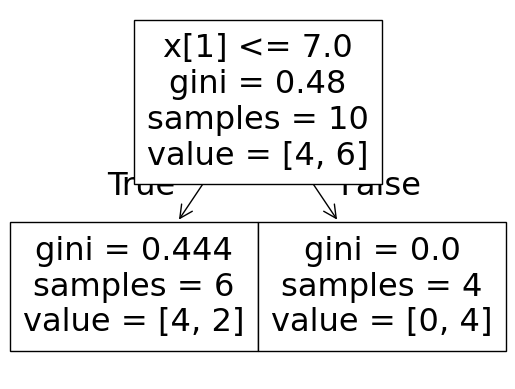

In [115]:
plot_tree(dt2)

<Axes: >

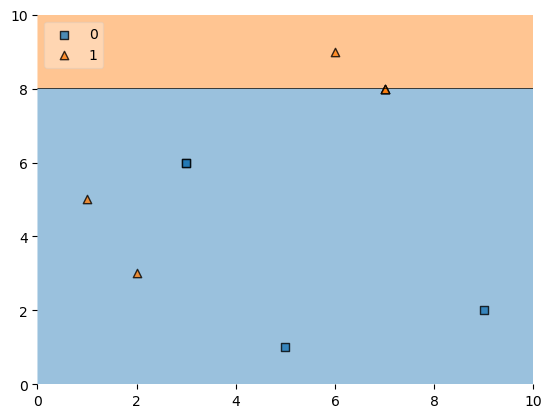

In [116]:
plot_decision_regions(X, y, clf=dt2, legend = 2)

In [117]:
second_df['y_pred'] = dt2.predict(X)

In [118]:
second_df

,X1,X2,label,weights,y_pred
7,7,8,1,0.1,1
5,6,9,1,0.1,1
4,5,1,0,0.1,0
2,3,6,0,0.1,0
7,7,8,1,0.1,1
7,7,8,1,0.1,1
1,2,3,1,0.1,0
9,9,2,0,0.1,0
2,3,6,0,0.1,0
0,1,5,1,0.1,0


In [126]:
alpha2 = calculate_model_weight(calculate_error(second_df))
alpha2

np.float64(0.6931471805599453)

In [128]:
# step 4 - Update weights

def update_row_weights(row, alpha2 = 0.69):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-1 * alpha2)
    else:
        return row['weights'] * np.exp(alpha2)

In [129]:
second_df['updated_weights'] = second_df.apply(update_row_weights, axis = 1)

In [130]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
0,7,8,1,0.1,1,0.050158
1,6,9,1,0.1,1,0.050158
2,5,1,0,0.1,0,0.050158
3,3,6,0,0.1,0,0.050158
4,7,8,1,0.1,1,0.050158
5,7,8,1,0.1,1,0.050158
6,2,3,1,0.1,0,0.199372
7,9,2,0,0.1,0,0.050158
8,3,6,0,0.1,0,0.050158
9,1,5,1,0.1,0,0.199372


In [131]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [132]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,7,8,1,0.1,1,0.050158,0.062697
1,6,9,1,0.1,1,0.050158,0.062697
2,5,1,0,0.1,0,0.050158,0.062697
3,3,6,0,0.1,0,0.050158,0.062697
4,7,8,1,0.1,1,0.050158,0.062697
5,7,8,1,0.1,1,0.050158,0.062697
6,2,3,1,0.1,0,0.199372,0.249213
7,9,2,0,0.1,0,0.050158,0.062697
8,3,6,0,0.1,0,0.050158,0.062697
9,1,5,1,0.1,0,0.199372,0.249213


In [134]:
second_df['normalized_weights'].sum()

np.float64(1.0)

In [135]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

In [136]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [137]:
second_df[['X1','X2','label','weights','y_pred','normalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,normalized_weights,cumsum_lower,cumsum_upper
0,7,8,1,0.1,1,0.062697,0.000000,0.062697
1,6,9,1,0.1,1,0.062697,0.062697,0.125393
2,5,1,0,0.1,0,0.062697,0.125393,0.188090
3,3,6,0,0.1,0,0.062697,0.188090,0.250787
4,7,8,1,0.1,1,0.062697,0.250787,0.313483
5,7,8,1,0.1,1,0.062697,0.313483,0.376180
6,2,3,1,0.1,0,0.249213,0.376180,0.625393
7,9,2,0,0.1,0,0.062697,0.625393,0.688090
8,3,6,0,0.1,0,0.062697,0.688090,0.750787
9,1,5,1,0.1,0,0.249213,0.750787,1.000000


In [141]:
index_values = create_new_dataset(second_df)

In [142]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [143]:
third_df

,X1,X2,label,weights
9,1,5,1,0.1
4,7,8,1,0.1
0,7,8,1,0.1
9,1,5,1,0.1
6,2,3,1,0.1
9,1,5,1,0.1
3,3,6,0,0.1
5,7,8,1,0.1
7,9,2,0,0.1
3,3,6,0,0.1


In [144]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [146]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

DecisionTreeClassifier(max_depth=1)

<Axes: >

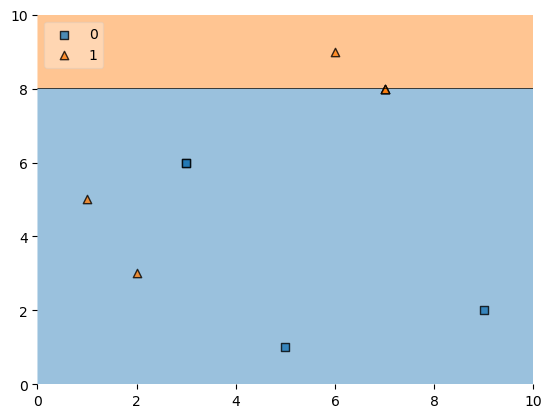

In [147]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [148]:
third_df['y_pred'] = dt3.predict(X)

In [149]:
third_df

,X1,X2,label,weights,y_pred
9,1,5,1,0.1,1
4,7,8,1,0.1,1
0,7,8,1,0.1,0
9,1,5,1,0.1,0
6,2,3,1,0.1,1
9,1,5,1,0.1,1
3,3,6,0,0.1,0
5,7,8,1,0.1,0
7,9,2,0,0.1,0
3,3,6,0,0.1,0


In [158]:
alpha3 = calculate_model_weight(calculate_error(third_df))
alpha3

np.float64(0.4236487635269628)

In [159]:
print(alpha1,alpha2,alpha3)

0.4236489301936017 0.6931471805599453 0.4236487635269628


# prediction

In [175]:
query1 = np.array([1,5]).reshape(1,2)
dt1.predict(query1)

array([1])

In [176]:
dt2.predict(query1)

array([0])

In [178]:
dt3.predict(query1)

array([0])

In [179]:
alpha1*(1) + alpha2*(0) + alpha3*(0)

np.float64(0.4236489301936017)

In [171]:
np.sign(0.42)

np.float64(1.0)

In [180]:
query2 = np.array([9,9]).reshape(1,2)
dt1.predict(query2)

array([0])

In [181]:
dt2.predict(query2)

array([1])

In [182]:
dt3.predict(query2)

array([1])

In [172]:
alpha1*(-1) + alpha2*(1) + alpha3*(1)

np.float64(0.6931470138933064)

In [173]:
np.sign(0.69)

np.float64(1.0)

In [183]:
query3 = np.array([3,6]).reshape(1,2)
dt1.predict(query3)

array([0])

In [185]:
dt2.predict(query3)

array([0])

In [186]:
dt3.predict(query3)

array([0])

In [187]:
alpha1*(-1) + alpha2*(-1) + alpha3*(-1)

np.float64(-1.54044487428051)

In [188]:
np.sign(-1.54)

np.float64(-1.0)